In [1]:
# Today we are working on predicting fake news...

- The Dataset is available in a CSV file known as  :- **fake_news_detection_data.csv**

In [2]:
# Before moving ahead we will brush up some important concepts which we will use in this project.

## What is Fake News?
> Fake news is false or misleading information presented as news.It often has the aim of damaging the reputation of a person or entity, or making money through advertising revenue. Media scholar Nolan Higdon has defined fake news as "false or misleading content presented as news and communicated in formats spanning spoken, written, printed, electronic, and digital communication.

## What is a TfidfVectorizer?
> TF (Term Frequency): The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

> IDF (Inverse Document Frequency): Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

## What is a PassiveAggressiveClassifier?
> Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
fake_news_data = pd.read_csv("C:\\Users\\raj28\\OneDrive\\Desktop\\Datasets\\fake_news_detection_data.csv")

In [5]:
fake_news_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
# In the above dataset the "Unnamed: 0" column contains some irrelevant serial numbers, so we will drop them.

In [7]:
fake_news_data.drop(["Unnamed: 0"], axis = 1,inplace = True)

In [8]:
fake_news_data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [9]:
fake_news_data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [10]:
# So our output seems to be balanced. 

In [11]:
fake_news_data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [12]:
# Our dataset contains 0 NaN values.

In [13]:
# So let's split our dataset into Training and Testing data.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(fake_news_data["text"], fake_news_data["label"],
                                                    test_size=0.25, random_state=101)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.6)

In [18]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [20]:
pac = PassiveAggressiveClassifier(max_iter=100)

In [21]:
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=100)

In [22]:
predicted = pac.predict(tfidf_test)

In [23]:
# Let's look at the accuracy score of our model.

In [24]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix

In [25]:
print(f"Accuracy Score: {round(accuracy_score(y_test,predicted)*100,2)}%")

Accuracy Score: 93.88%


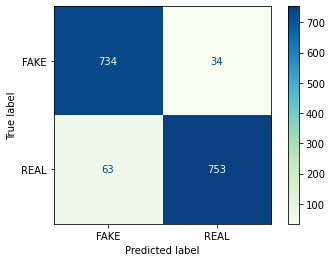

In [26]:
plot_confusion_matrix(pac,tfidf_test,y_test, cmap = "GnBu")

In [27]:
# So our model gave us an accuracy of around 94%.

In [28]:
# Implementing Naive baye's algorithm..

In [ ]:
from sklearn.naive_bayes import 